# Weighted Logistic Regression for Imbalanced Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
%matplotlib inline

In [2]:
sns.set()

In [3]:
# create a imbalanced dataset of 10K with 2 class
x, y = make_classification(n_samples = 10000  # number of samples
                          ,n_features = 2    # feature/label count
                          ,n_informative = 2 # informative features
                          ,n_redundant = 0   # redundant features
                          ,n_repeated = 0    # duplicate features
                          ,n_clusters_per_class = 1  # number of clusters per class; clusters during plotting
                          ,weights = [0.99]   # proportions of samples assigned to each class
                          ,flip_y = 0         # fraction of samples whose class is assigned randomly. 
                          ,random_state = 13)

In [4]:
df = pd.DataFrame(x,columns=['x1','x2'])
df['y'] = y

In [5]:
df.head()

,x1,x2,y
0,-1.911993,1.242198,0
1,-0.315770,0.578322,0
2,-1.506794,1.146743,0
3,-0.040029,0.466570,0
4,-1.420019,1.051144,0


In [6]:
df['y'].value_counts() / df.shape[0]

0    0.99
1    0.01
Name: y, dtype: float64

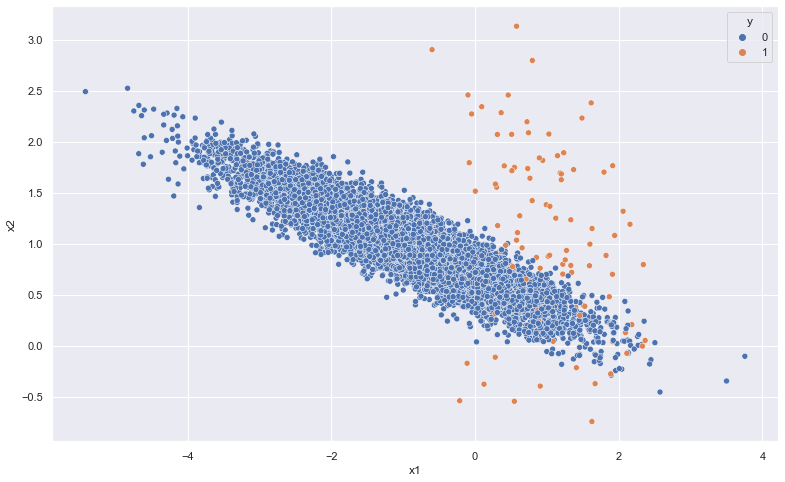

In [7]:
fig, ax = plt.subplots(figsize = (13, 8))
sns.scatterplot(data = df,x = 'x1',y = 'x2',hue = 'y');

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
x = df.drop('y',axis=1)
y = df['y']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 13)

In [11]:
# define model
cls = LogisticRegression(random_state=13, class_weight=None)

In [12]:
# fit it
cls.fit(X_train,y_train)

LogisticRegression(random_state=13)

In [13]:
# test
y_pred = cls.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2971
           1       0.93      0.48      0.64        29

    accuracy                           0.99      3000
   macro avg       0.96      0.74      0.82      3000
weighted avg       0.99      0.99      0.99      3000



In [15]:
confusion_matrix(y_test, y_pred)

array([[2970,    1],
       [  15,   14]], dtype=int64)

# Weighted Logistic Regression

In [16]:
df['y'].value_counts() / df.shape[0]

0    0.99
1    0.01
Name: y, dtype: float64

In [17]:
# define class weights
w = {0 : 1, 1 : 99}

In [18]:
# define model
cls = LogisticRegression(random_state = 13, class_weight = w)

In [19]:
# fit it
cls.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 99}, random_state=13)

In [20]:
# test
y_pred = cls.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2971
           1       0.08      0.86      0.14        29

    accuracy                           0.90      3000
   macro avg       0.54      0.88      0.54      3000
weighted avg       0.99      0.90      0.94      3000



In [22]:
confusion_matrix(y_test, y_pred)

array([[2669,  302],
       [   4,   25]], dtype=int64)

# Weights GridSearch

In [25]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

In [26]:
hyperparam_grid = {"class_weight": w }

In [27]:
# define model
cls = LogisticRegression(random_state = 13)

In [28]:
# define evaluation procedure
grid = GridSearchCV(cls, hyperparam_grid, scoring = "recall", cv = 100, n_jobs = -1, refit = True)
grid.fit(x,y)

GridSearchCV(cv=100, estimator=LogisticRegression(random_state=13), n_jobs=-1,
             param_grid={'class_weight': [{0: 1000, 1: 100}, {0: 1000, 1: 10},
                                          {0: 1000, 1: 1.0}, {0: 500, 1: 1.0},
                                          {0: 400, 1: 1.0}, {0: 300, 1: 1.0},
                                          {0: 200, 1: 1.0}, {0: 150, 1: 1.0},
                                          {0: 100, 1: 1.0}, {0: 99, 1: 1.0},
                                          {0: 10, 1: 1.0}, {0: 0.01, 1: 1.0},
                                          {0: 0.01, 1: 10}, {0: 0.01, 1: 100},
                                          {0: 0.001, 1: 1.0},
                                          {0: 0.005, 1: 1.0}, {0: 1.0, 1: 1.0},
                                          {0: 1.0, 1: 0.1}, {0: 10, 1: 0.1},
                                          {0: 100, 1: 0.1}, {0: 10, 1: 0.01},
                                          {0: 1.0, 1: 0.01}, {0: 1.0, 1: 0.0

In [29]:
print('Best score: {} with param: {}'.format(grid.best_score_, grid.best_params_))

Best score: 1.0 with param: {'class_weight': {0: 0.01, 1: 100}}


In [30]:
cls = LogisticRegression(random_state = 13, class_weight = {0: 0.01, 1: 100})

In [31]:
cls.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.01, 1: 100}, random_state=13)

In [32]:
y_pred = cls.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67      2971
           1       0.02      1.00      0.04        29

    accuracy                           0.51      3000
   macro avg       0.51      0.75      0.36      3000
weighted avg       0.99      0.51      0.67      3000



In [34]:
confusion_matrix(y_test, y_pred)

array([[1504, 1467],
       [   0,   29]], dtype=int64)